**Необходимо провести базовый EDA выбранного набора данных.**   

- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Рассмотрим рейтинг счастья.**   
При составлении рейтинга учитываются такие показатели благополучия, как уровень ВВП на душу населения, ожидаемая продолжительность жизни, наличие гражданских свобод, чувство безопасности и уверенности в завтрашнем дне, стабильность семей, гарантии занятости, уровень коррупции, а также косвенные показатели состояния общества, такие как уровень доверия, великодушие и щедрость.

In [13]:
# для начала посмотрим на данные 2015 года
df = pd.read_csv('viz/happiness/2015.csv')

In [8]:
df.shape

(158, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [10]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [16]:
df_happy = df[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]
df_happy.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


Визуализируем корреляционную матрицу с помощью тепловой карты

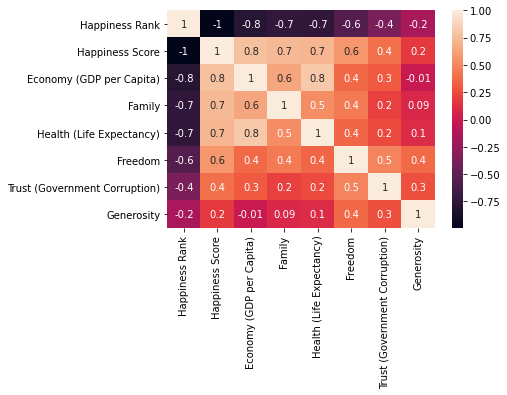

In [17]:
sns.heatmap(df_happy.corr(), annot = True, fmt = '.1g')

Мы видим прямые зависимости. Уровень счастья выше в странах с высоким ВВП, благополулучием института семьи, продолжительностью жизни (которая зависит от качества жизни и таких ее составляющих, как доход, доступность медицинской помощи etc.)
Тогда как гражданские свободы и уровень коррупции влияет на общий индекс счастья в меньшей степени.

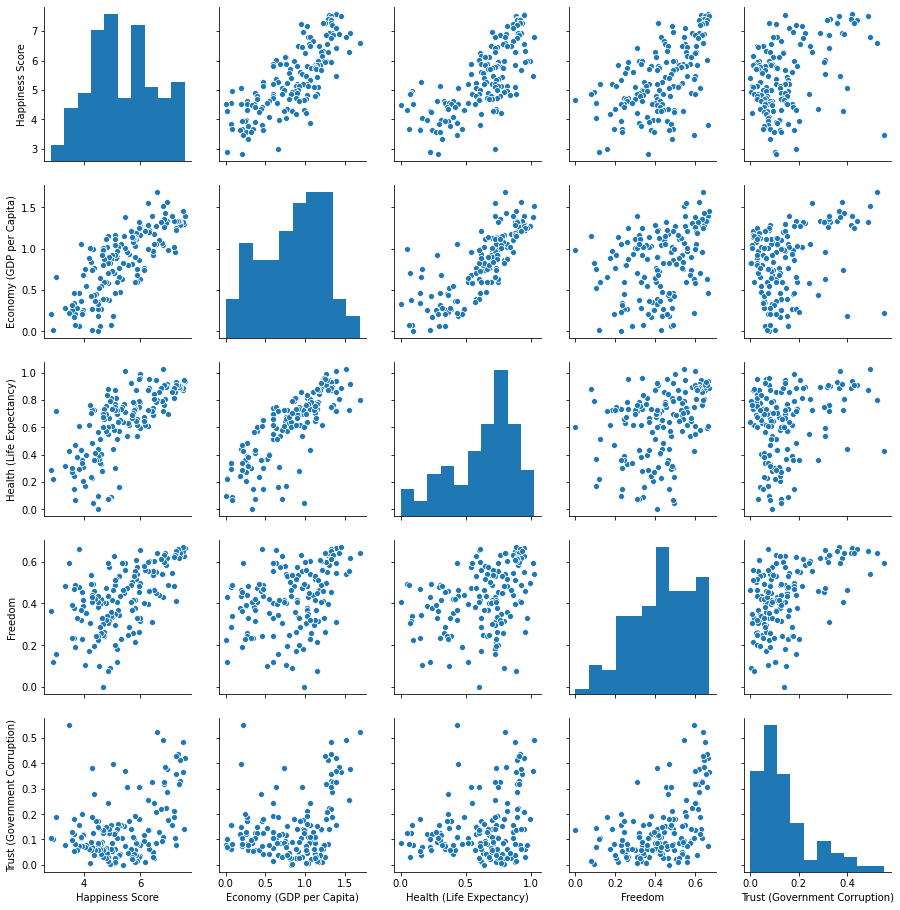

In [20]:
sns.pairplot(df_happy[['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)']])

In [129]:
top_HC = df_happy.set_index('Country')
top_HC.head()

,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Country,,,,,,,,,
Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


**Посмотрим на TOP-10 самых счастливых стран 2015 года**

In [94]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,6

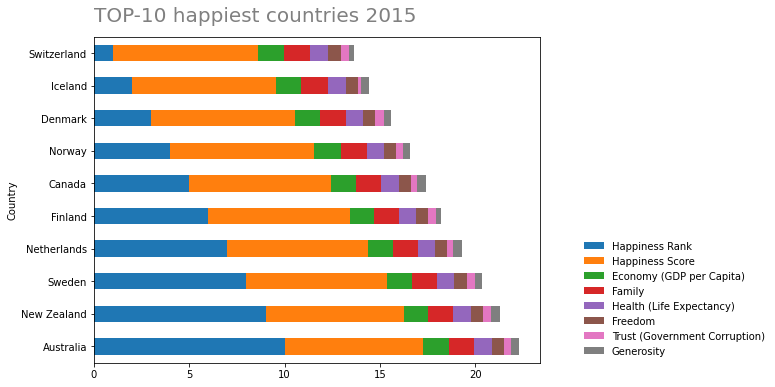

In [128]:
ax = top_HC.head(10).plot(kind = 'barh', stacked = True)
ax.legend(loc = 'upper center', fontsize = 'medium' , bbox_to_anchor=(1.3, 0.4), frameon = False)
ax.set_title('TOP-10 happiest countries 2015', loc = 'left', pad = 15, fontsize = 20, color = 'grey')
plt.gca().invert_yaxis()
plt.show() 

**Посмотрим на TOP-10 самых несчастливых стран 2015 года**

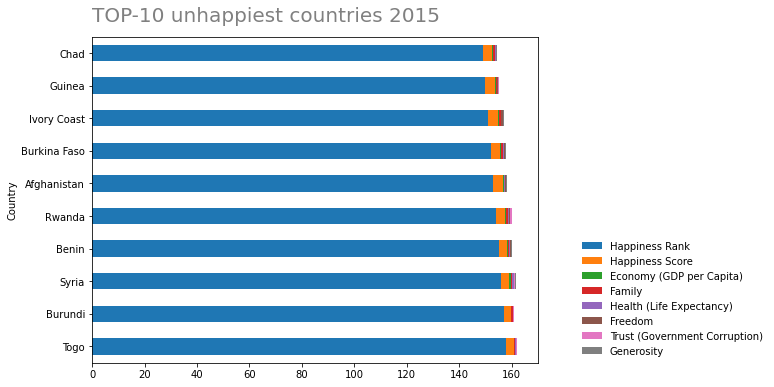

In [139]:
ax = top_HC.tail(10).plot(kind = 'barh', stacked = True)
ax.legend(loc = 'upper center', fontsize = 'medium' , bbox_to_anchor=(1.3, 0.4), frameon = False)
ax.set_title('TOP-10 unhappiest countries 2015', loc = 'left', pad = 15, fontsize = 20, color = 'grey')
plt.gca().invert_yaxis()
plt.show() 

**Посмотрим на распределение по регионам TOP-20 самых счастливых стран**
Большинство стран с высоким индексом счастья находятся в Западной Европе

In [175]:
region = round(top_HC.head(20)['Region'].value_counts()/top_HC.head(20)['Region'].count()*100)
region

Western Europe                     55.0
Latin America and Caribbean        15.0
North America                      10.0
Middle East and Northern Africa    10.0
Australia and New Zealand          10.0
Name: Region, dtype: float64

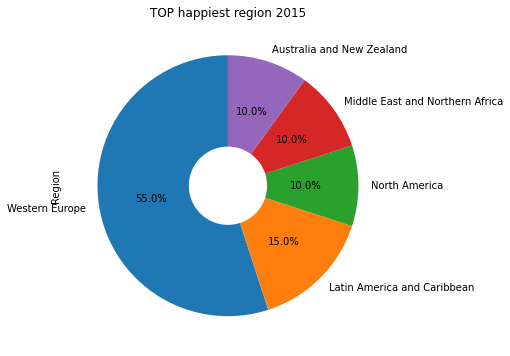

In [179]:
region.plot(kind = 'pie', title = 'TOP happiest region 2015', autopct = '%1.1f%%', startangle = 90, wedgeprops=dict(width=0.7))

**Посмотрим на распределение по уровню счастья.**   
Если это десятибальная система, то ни одна страна не набрала высший балл. 
Но в целом, по сравнению с 2015 годом, к 2019 уровень счастья немного подрос. 

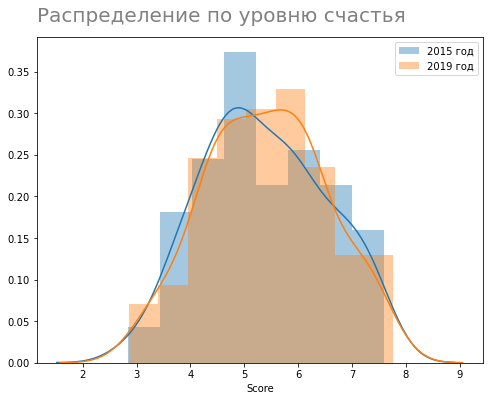

In [183]:
ax = sns.distplot(df_happy['Happiness Score'])
ax = sns.distplot(df_1['Score'])
ax.set_title('Распределение по уровню счастья', loc = 'left', pad = 15, fontsize = 20, color = 'grey')
plt.legend(['2015 год', '2019 год'])

**А где же Россия?**

In [135]:
rus = df_happy.loc[df_happy['Country'] == 'Russia']
rus

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
63,Russia,Central and Eastern Europe,64,5.716,1.13764,1.23617,0.66926,0.36679,0.03005,0.00199


In [144]:
rus_neighbour = top_HC[['Happiness Rank']]
rus_neighbour.head()

,Happiness Rank
Country,
Switzerland,1
Iceland,2
Denmark,3
Norway,4
Canada,5


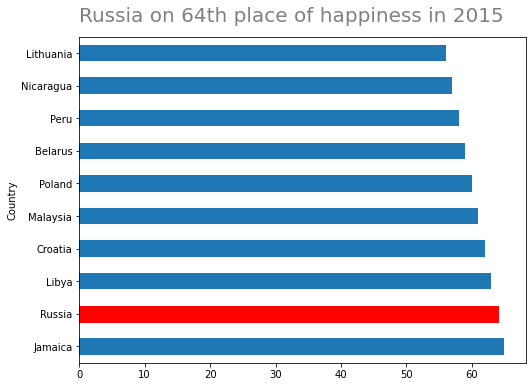

In [162]:
ax = rus_neighbour[55:65].plot(kind = 'barh', legend = False)
ax.set_title('Russia on 64th place of happiness in 2015', loc = 'left', pad = 15, fontsize = 20, color = 'grey')
plt.gca().invert_yaxis()
ax.patches[8].set_color('red')
plt.show() 

**Посмотрим, что изменилось за 5 лет**
К сожалению, Россия опустилпсь в рейтинге счастья на 68 место.   
Зато у нас новые соседи - Пакистан и Филиппины

In [168]:
df_1 = pd.read_csv('viz/happiness/2019.csv')
df_new = df_1.set_index('Country or region')
rus_neighbour_2019 = df_new[['Overall rank']]
ru = df_1.loc[df_1['Country or region'] == 'Russia']
ru

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
67,68,Russia,5.648,1.183,1.452,0.726,0.334,0.082,0.031


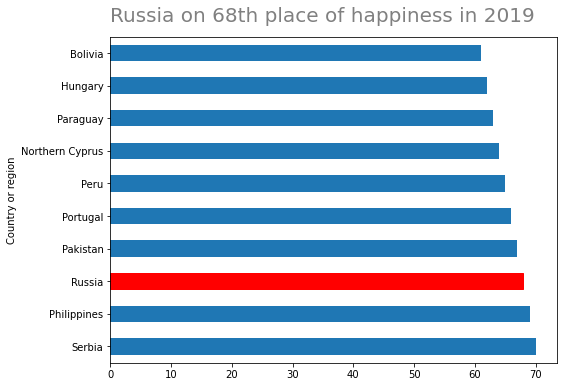

In [170]:
ax = rus_neighbour_2019[60:70].plot(kind = 'barh', legend = False)
ax.set_title('Russia on 68th place of happiness in 2019', loc = 'left', pad = 15, fontsize = 20, color = 'grey')
plt.gca().invert_yaxis()
ax.patches[7].set_color('red')
plt.show() 